# EDA for Macau historical weather data (2020-2025) 🇲🇴

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
%matplotlib inline

## Load and prepare the data

In [3]:
df = pd.read_csv("../data/raw/open-meteo-22.18N113.50E23m-Macau.csv")
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

df.head()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h),city,month
0,2020-01-01,3,17.9,16.8,79,16.3,Macau,January
1,2020-01-02,51,18.0,17.5,80,12.8,Macau,January
2,2020-01-03,3,18.8,18.8,82,13.0,Macau,January
3,2020-01-04,3,18.8,19.3,84,10.3,Macau,January
4,2020-01-05,3,19.5,19.3,82,16.8,Macau,January


## General dataset overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            1994 non-null   datetime64[ns]
 1   weather_code (wmo code)         1994 non-null   int64         
 2   temperature_2m_mean (°C)        1994 non-null   float64       
 3   apparent_temperature_mean (°C)  1994 non-null   float64       
 4   relative_humidity_2m_mean (%)   1994 non-null   int64         
 5   wind_speed_10m_mean (km/h)      1994 non-null   float64       
 6   city                            1994 non-null   object        
 7   month                           1994 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 111.5+ KB


In [5]:
df.describe()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h)
count,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2022-09-23 12:00:00,39.251755,23.131946,25.202959,80.194082,14.493129
min,2020-01-01 00:00:00,0.000000,6.800000,1.500000,32.000000,4.200000
25%,2021-05-13 06:00:00,3.000000,19.125000,19.000000,75.000000,10.600000
50%,2022-09-23 12:00:00,51.000000,24.100000,26.400000,84.000000,14.100000
75%,2024-02-03 18:00:00,61.000000,27.600000,32.500000,88.000000,17.600000
max,2025-06-16 00:00:00,65.000000,31.100000,38.200000,96.000000,46.800000
std,NaN,25.575323,5.000557,8.000513,11.124797,5.302715


In [6]:
df.dtypes

time                              datetime64[ns]
weather_code (wmo code)                    int64
temperature_2m_mean (°C)                 float64
apparent_temperature_mean (°C)           float64
relative_humidity_2m_mean (%)              int64
wind_speed_10m_mean (km/h)               float64
city                                      object
month                                   category
dtype: object

In [7]:
df.isnull().sum()

time                              0
weather_code (wmo code)           0
temperature_2m_mean (°C)          0
apparent_temperature_mean (°C)    0
relative_humidity_2m_mean (%)     0
wind_speed_10m_mean (km/h)        0
city                              0
month                             0
dtype: int64

In [8]:
df.duplicated(['city', 'time']).sum()

np.int64(0)

> No null values nor duplicates found

## Univariate analysis

## Daily temperature distribution
> The number of days when the mean temperature fell within a certain range

Text(0.5, 0, 'Temperature (°C)')

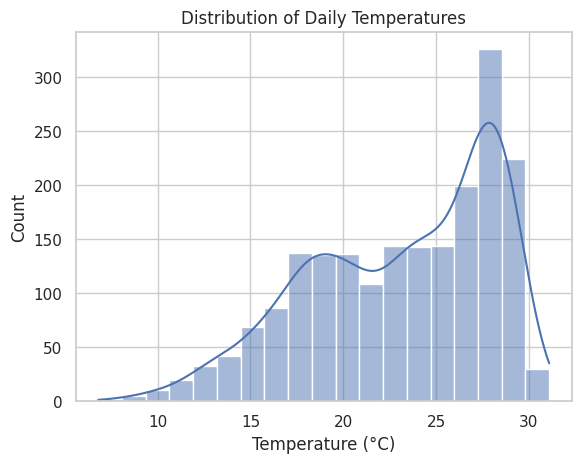

In [9]:
sns.histplot(df['temperature_2m_mean (°C)'], kde=True)
plt.title("Distribution of Daily Temperatures")
plt.xlabel("Temperature (°C)")

- Most temperatures fall between **25.5°C and 28°C**
- Most common average daily temperature: **27°C**
- Very few extreme days (<25°C or >29°C)

## Daily humidity distribution

Text(0.5, 1.0, 'Humidity Level Distribution')

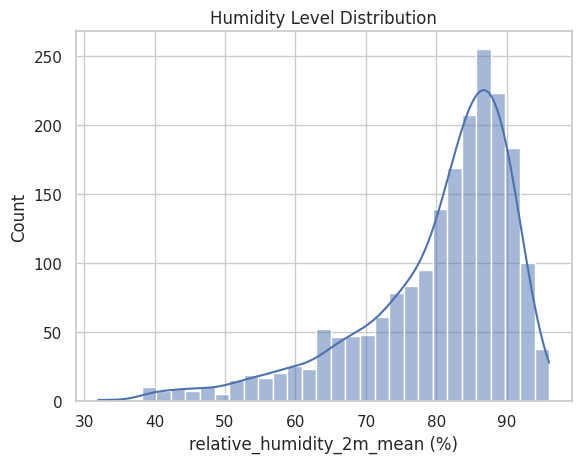

In [10]:
sns.histplot(df['relative_humidity_2m_mean (%)'], kde=True)
plt.title("Humidity Level Distribution")

- Most days have high humidity percentage **(>85%)**

## Daily apparent temperature distribution

Text(0.5, 1.0, 'Apparent Temperature Distribution')

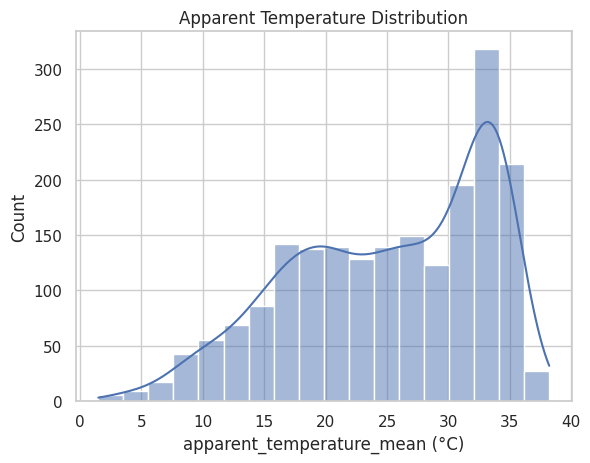

In [11]:
sns.histplot(df['apparent_temperature_mean (°C)'], kde=True)
plt.title("Apparent Temperature Distribution")

- Macau has a **very warm perceived climate** year-round
- High humidity makes it feel 32°C on most days

## In-depth analysis

### Actual vs Apparent Temperature

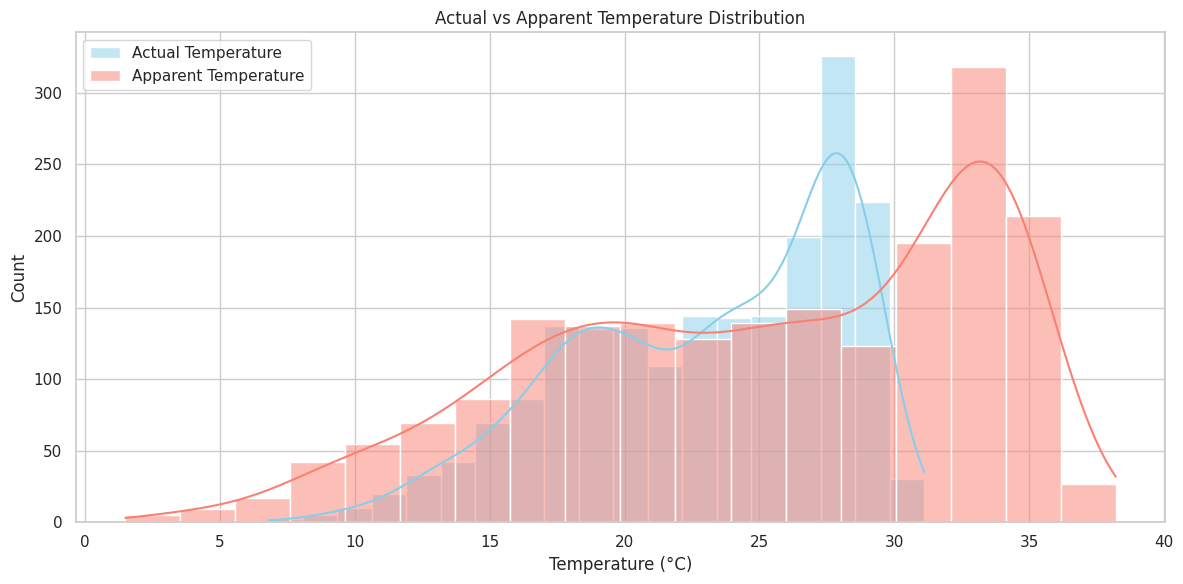

In [12]:
plt.figure(figsize=(12, 6))

sns.histplot(df['temperature_2m_mean (°C)'], kde=True, color='skyblue', label='Actual Temperature', stat="count")

sns.histplot(df['apparent_temperature_mean (°C)'], kde=True, color='salmon', label='Apparent Temperature', stat="count")

plt.title("Actual vs Apparent Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

- High humidity makes actual temperature feels higher than actual temperature
- The city tends to feel hotter than it is

In [13]:
# Compute monthly averages
monthly_avg = df.groupby('month', as_index=False, observed=True).agg({
    'temperature_2m_mean (°C)': 'mean',
    'relative_humidity_2m_mean (%)': 'mean'
})
# Ensure the month order is preserved after grouping
monthly_avg['month'] = pd.Categorical(
    monthly_avg['month'],
    categories=month_order,
    ordered=True
)

# Then sort by month
monthly_avg = monthly_avg.sort_values('month')


print(monthly_avg)

        month  temperature_2m_mean (°C)  relative_humidity_2m_mean (%)
0     January                 16.416129                      70.446237
1    February                 17.191176                      79.482353
2       March                 20.324194                      83.892473
3       April                 23.060000                      84.350000
4         May                 26.013441                      86.231183
5        June                 27.978916                      86.271084
6        July                 28.898710                      83.167742
7      August                 28.106452                      86.251613
8   September                 27.626667                      85.386667
9     October                 24.901290                      74.845161
10   November                 22.050000                      74.480000
11   December                 16.697419                      66.477419


### Monthly average temperature and humidity

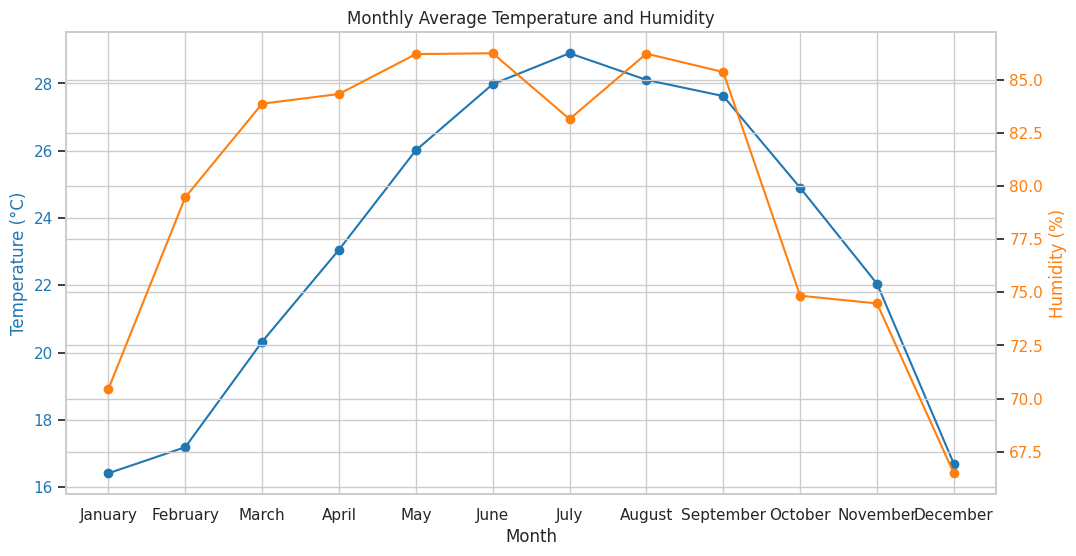

In [14]:
# Average monthly temperature and humidity plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on left axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.plot(monthly_avg['month'], monthly_avg['temperature_2m_mean (°C)'],
         marker='o', color='tab:blue', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.set_ylabel('Humidity (%)', color='tab:orange')
ax2.plot(monthly_avg['month'], monthly_avg['relative_humidity_2m_mean (%)'],
         marker='o', color='tab:orange', label='Humidity')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly Average Temperature and Humidity")
plt.xticks(rotation=45)
plt.show()

## Correlations of each numerical value

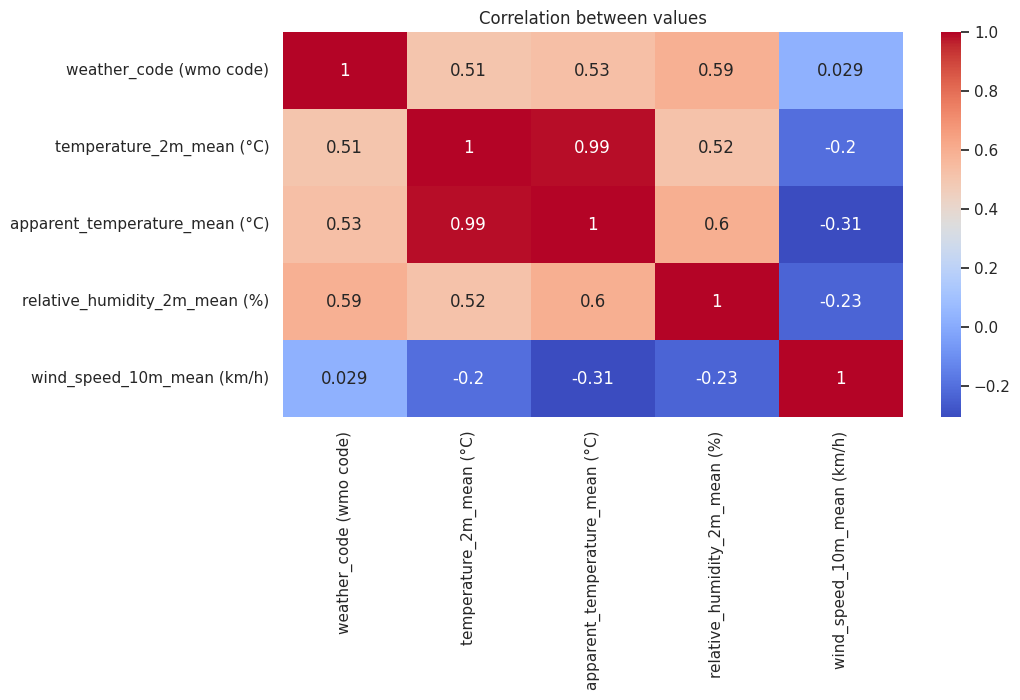

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation between values")
plt.show()

- The apparent temperature rises with the actual temperature.
- As temperature increases, relative humidity tends to decrease.
- Wind speed doesn’t seem to significantly co-vary with other factors.